In [1]:
import numpy as np #numerical computing
import pandas as pd #data manipulization and  visualization
import matplotlib.pyplot as plt #plotting
import flask 

In [2]:
# Load movie data from CSV files
movies = pd.read_csv('C:/Users/sanskruti/Downloads/tmdb_5000_movies.csv')
credits = pd.read_csv('C:/Users/sanskruti/Downloads/tmdb_5000_credits.csv')

In [5]:
# Merge datasets on 'id'
merged_df = pd.merge(movies, credits, how='inner', left_on='id', right_on='movie_id')

In [6]:
# Data Cleaning
# Dropping duplicates and irrelevant columns
merged_df.drop_duplicates(subset='id', inplace=True)
merged_df.drop(columns=['movie_id', 'title_y', 'homepage', 'status', 'tagline'], inplace=True)

# Handle missing values
merged_df.dropna(inplace=True)  # Drop rows with any missing values

In [7]:
# Normalize numerical features
numerical_features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
merged_df[numerical_features] = merged_df[numerical_features].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [9]:
# Feature Extraction
# Extracting first actor and director from cast and crew columns
merged_df['actor'] = merged_df['cast'].apply(lambda x: x.split(',')[0] if ',' in x else x)
merged_df['director'] = merged_df['crew'].apply(lambda x: x.split(',')[0] if ',' in x else x)

# Further feature extraction can be performed as per specific requirements

# Print cleaned and processed DataFrame
print(merged_df.head())

     budget                                             genres      id  \
0  0.623684  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  0.789474  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  0.644737  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  0.657895  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  0.684211  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of th

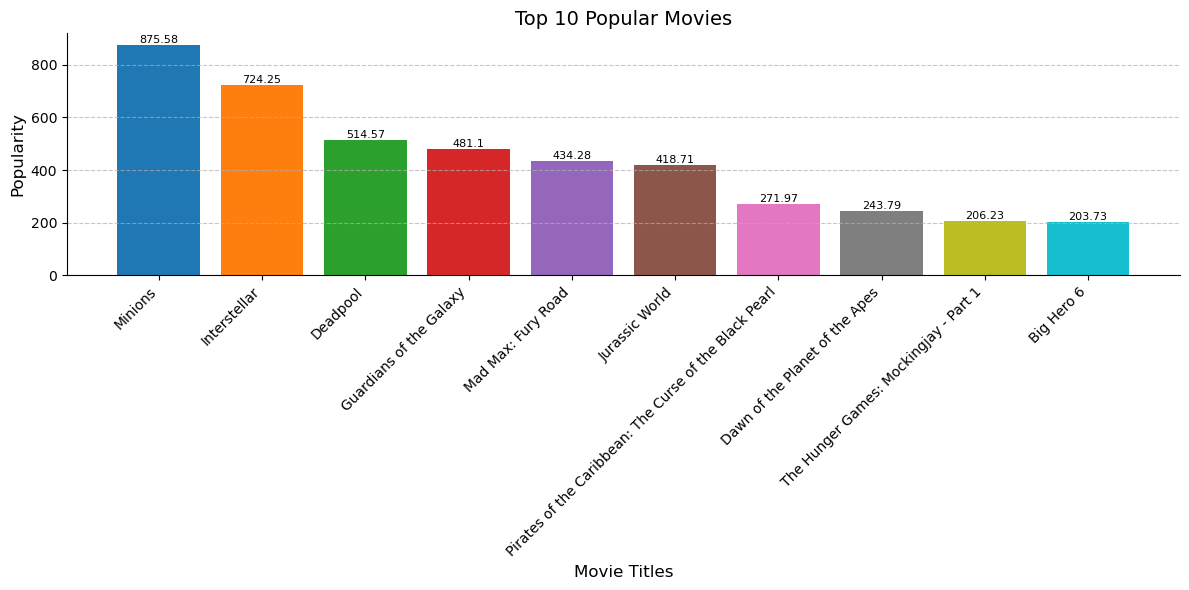

In [10]:
import matplotlib.pyplot as plt

# Assuming 'movies' is your DataFrame
popularity_df = movies[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

# Create a list of colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(12, 6))
bars = plt.bar(popularity_df['title'], popularity_df['popularity'], color=colors)

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom', fontsize=8, color='black')

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)
plt.xlabel('Movie Titles', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Top 10 Popular Movies', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.show()

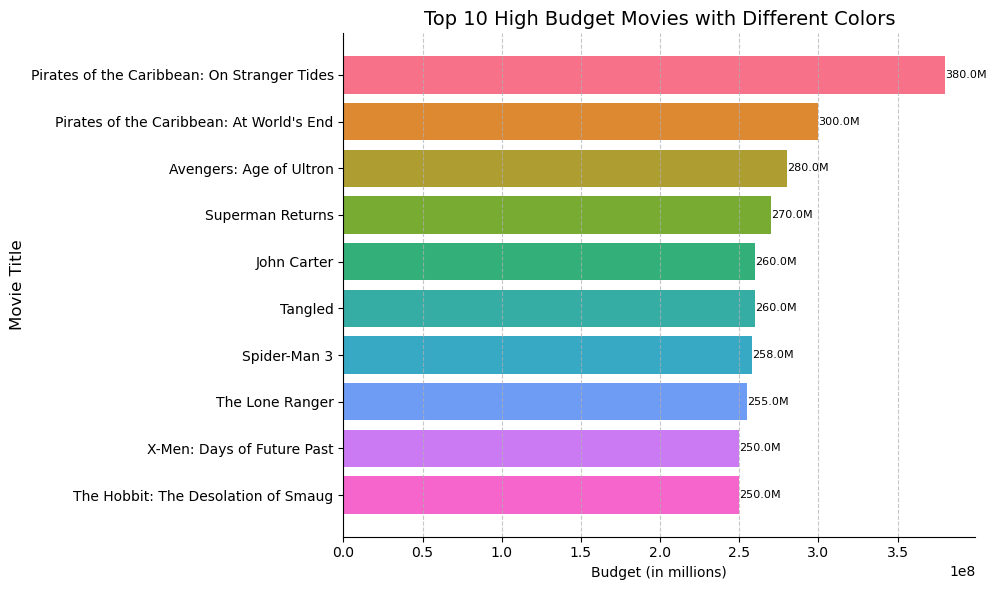

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palettes for statistics data

# Sort Movies based on their budget
budget_movies = movies.sort_values('budget', ascending=False)

# Select top high budget movies
top_high_budget_movies = budget_movies.head(10)

# Define a color palette
colors = sns.color_palette("husl", 10)  # Using the "husl" color palette with 10 different colors

# Plotting high budget movies with different colors
plt.figure(figsize=(10, 6))
bars = plt.barh(top_high_budget_movies['title'], top_high_budget_movies['budget'], color=colors)

# Add data labels
for bar in bars:
    plt.text(bar.get_width() + 3, bar.get_y() + bar.get_height()/2, 
             '{:.1f}M'.format(bar.get_width()/1000000), 
             va='center', ha='left', fontsize=8, color='black')

plt.xlabel('Budget (in millions)')
plt.ylabel('Movie Title', fontsize=12)
plt.title('Top 10 High Budget Movies with Different Colors', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have highest budget at the top
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

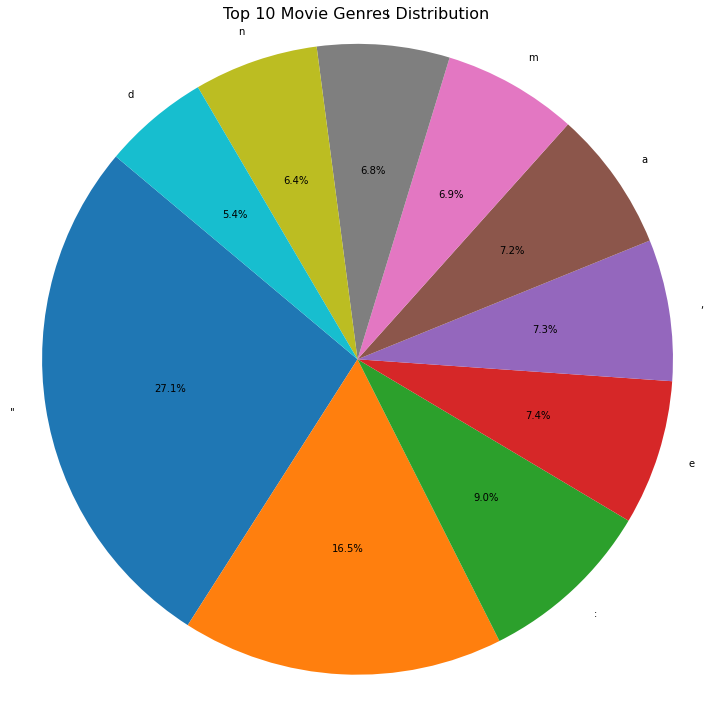

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Flatten the lists of genres
all_genres = [genre for genres_list in movies['genres'] for genre in genres_list]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plot a pie chart for the top N genres
top_n = 10  # You can adjust this value as needed

# Define custom colors for the pie chart
colors = plt.cm.tab10(range(top_n))

plt.figure(figsize=(10, 10))
plt.pie(genre_counts.head(top_n), labels=genre_counts.head(top_n).index, autopct='%1.1f%%', colors=colors, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.title(f'Top {top_n} Movie Genres Distribution', fontsize=16)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [14]:
conda install pandas=1.3.3


Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - pandas=1.3.3

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


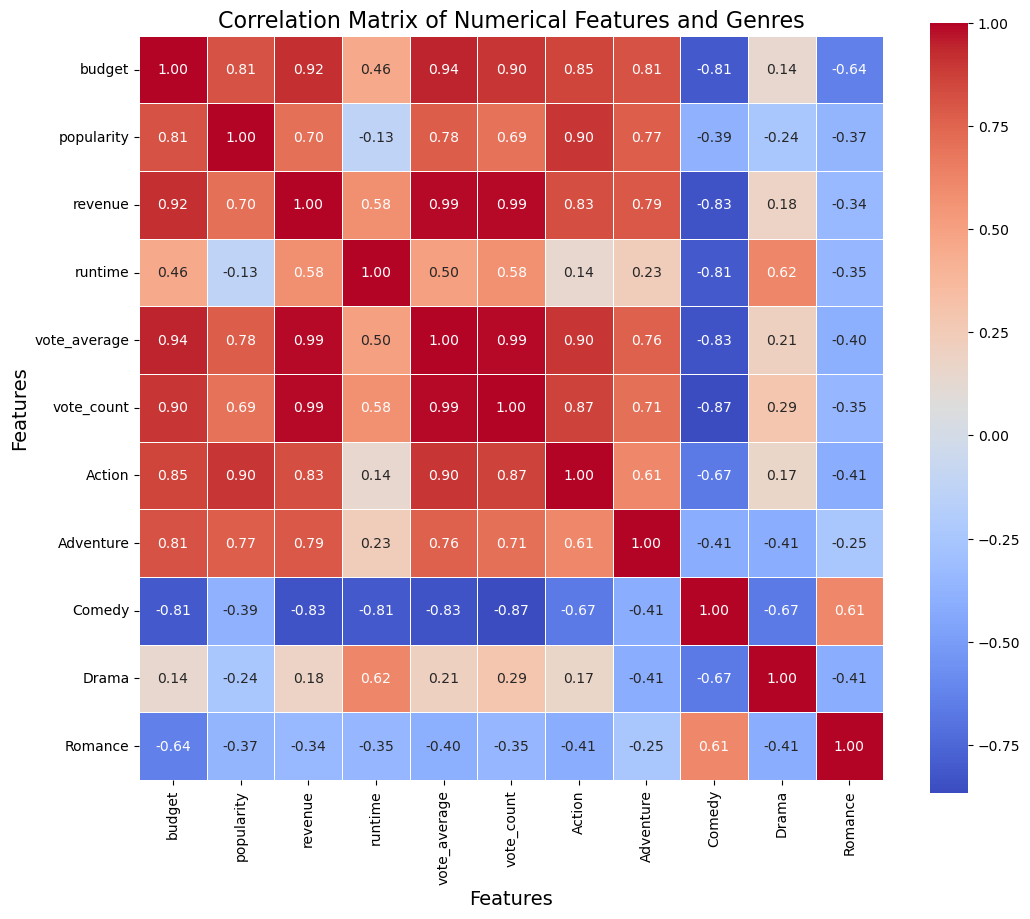

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `movies` is a DataFrame containing movie data

data = {
    'genres': ['Action|Adventure', 'Comedy|Romance', 'Drama', 'Action|Drama', 'Comedy'],
    'budget': [100000000, 50000000, 70000000, 80000000, 60000000],
    'popularity': [8.5, 7.2, 6.9, 8.0, 7.5],
    'revenue': [250000000, 150000000, 180000000, 200000000, 120000000],
    'runtime': [120, 110, 130, 115, 105],
    'vote_average': [7.9, 6.8, 7.1, 7.5, 6.6],
    'vote_count': [1500, 1200, 1300, 1400, 1100]
}
movies = pd.DataFrame(data)

# Selecting only the numerical features
numerical_features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
numerical_df = movies[numerical_features]

# Encoding genres into dummy variables
genres_df = movies['genres'].str.get_dummies(sep='|')

# Concatenating DataFrames
combined_df = pd.concat([numerical_df, genres_df], axis=1)

# Calculate correlation matrix
correlation_matrix = combined_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plotting the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)

# Set plot title and labels
plt.title('Correlation Matrix of Numerical Features and Genres', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()


In [18]:
import heapq

# Sample movie data
movies = [
    {'title': 'Movie 1', 'genres': ['Action', 'Adventure'], 'vote_average': 8.0, 'popularity': 100},
    {'title': 'Movie 2', 'genres': ['Comedy', 'Romance'], 'vote_average': 7.5, 'popularity': 80},
    {'title': 'Movie 3', 'genres': ['Action', 'Thriller'], 'vote_average': 9.0, 'popularity': 120}
]

# Sample user preferences
user_preferences = {'genres': ['Action']}

# Sample heuristic function (Assuming it's already defined)
def heuristic(movie, user_preferences):
    # Example heuristic calculation based on genres, ratings, and popularity
    genre_similarity = len(set(movie['genres']) & set(user_preferences['genres'])) / len(set(user_preferences['genres']))
    rating_similarity = movie['vote_average'] / 10.0
    popularity_similarity = movie['popularity'] / 120.0  # Assuming 120 is the maximum popularity
    return genre_similarity * 0.5 + rating_similarity * 0.3 + popularity_similarity * 0.2

# Function to initialize priority queue with movies sorted by heuristic scores
def initialize_priority_queue(movies, user_preferences):
    priority_queue = []
    explored = set()
    
    for movie in movies:
        heuristic_score = heuristic(movie, user_preferences)
        heapq.heappush(priority_queue, (heuristic_score, movie))
    
    return priority_queue, explored

# Example usage
priority_queue, explored = initialize_priority_queue(movies, user_preferences)

# Output the priority queue (sorted by heuristic scores)
print("Priority Queue (sorted by heuristic scores):")
for item in priority_queue:
    print(item[1]['title'], "- Heuristic Score:", item[0])

Priority Queue (sorted by heuristic scores):
Movie 2 - Heuristic Score: 0.3583333333333333
Movie 1 - Heuristic Score: 0.9066666666666667
Movie 3 - Heuristic Score: 0.97


In [25]:
import pandas as pd
import heapq

# Load movie data from CSV file
movies_df = pd.read_csv('C:/Users/sanskruti/Downloads/tmdb_5000_movies.csv')

# Convert DataFrame to a list of dictionaries
movies = movies_df.to_dict('records')

# Define calculate_genre_similarity function
def calculate_genre_similarity(genres1, genres2):
    # Calculate genre similarity based on the number of common genres
    common_genres = len(set(genres1) & set(genres2))
    total_genres = len(set(genres1).union(genres2))
    genre_similarity = common_genres / total_genres if total_genres > 0 else 0
    return genre_similarity

# Define heuristic function
def heuristic(movie, user_preferences):
    # Define weights for different factors
    genre_weight = 0.5
    rating_weight = 0.3
    popularity_weight = 0.2
    
    # Calculate genre similarity
    genre_similarity = calculate_genre_similarity(movie['genres'], user_preferences['genres'])
    
    # Normalize and calculate rating similarity (assuming higher rating is better)
    rating_similarity = movie['vote_average'] / 10.0
    
    # Normalize and calculate popularity similarity (assuming higher popularity is better)
    popularity_similarity = movie['popularity'] / movies_df['popularity'].max()
    
    # Calculate total heuristic value as weighted sum of similarities
    total_similarity = (genre_weight * genre_similarity) + (rating_weight * rating_similarity) + (popularity_weight * popularity_similarity)
    
    return total_similarity

# Define get_related_movies function
def get_related_movies(movie):
    # This is a placeholder function. Implement logic to get related movies based on the given movie.
    # For example, you could fetch related movies from a database or API.
    related_movies = []  # Placeholder for related movies
    
    return related_movies

# Function to initialize priority queue with movies sorted by heuristic scores
def initialize_priority_queue(movies, user_preferences):
    priority_queue = []
    explored = set()
    
    for movie in movies:
        heuristic_score = heuristic(movie, user_preferences)
        heapq.heappush(priority_queue, (heuristic_score, movie))
    
    return priority_queue, explored

# Function to obtain user preferences explicitly through user input
def get_user_preferences_explicit():
    genres = input("Enter your preferred movie genres (separated by commas): ").strip().split(',')
    return {'genres': [genre.strip() for genre in genres]}

# Define recommend_movies function
def recommend_movies(user_preferences, movies):
    priority_queue, explored = initialize_priority_queue(movies, user_preferences)
    recommended_movies = []

    while priority_queue:
        _, current_movie = heapq.heappop(priority_queue)
        related_movies = get_related_movies(current_movie)  # Assuming this function returns related movies
        for neighbor in related_movies:
            neighbor_id = neighbor.get('id')
            if neighbor_id is not None and neighbor_id not in explored:
                neighbor_heuristic_score = heuristic(neighbor, user_preferences)
                heapq.heappush(priority_queue, (neighbor_heuristic_score, neighbor))
                explored.add(neighbor_id)
        
        recommended_movies.append(current_movie)
        
        if len(recommended_movies) >= 10:
            break
    
    return recommended_movies


Recommended Movies:
- Title: America Is Still the Place
  Genre: []
  Rating: 0.0
  Popularity: 0.0

- Title: Hum To Mohabbat Karega
  Genre: []
  Rating: 0.0
  Popularity: 0.001186

- Title: Midnight Cabaret
  Genre: [{"id": 27, "name": "Horror"}]
  Rating: 0.0
  Popularity: 0.001389

- Title: Down & Out With The Dolls
  Genre: [{"id": 35, "name": "Comedy"}, {"id": 10402, "name": "Music"}]
  Rating: 0.0
  Popularity: 0.002386

- Title: The Work and The Story
  Genre: [{"id": 35, "name": "Comedy"}]
  Rating: 0.0
  Popularity: 0.002388

- Title: Hav Plenty
  Genre: [{"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}, {"id": 878, "name": "Science Fiction"}, {"id": 53, "name": "Thriller"}]
  Rating: 0.0
  Popularity: 0.003142

- Title: Fabled
  Genre: [{"id": 18, "name": "Drama"}, {"id": 9648, "name": "Mystery"}, {"id": 53, "name": "Thriller"}]
  Rating: 0.0
  Popularity: 0.003352

- Title: The Legend of God's Gun
  Genre: [{"id": 28, "name": "Act

In [27]:
import pandas as pd
import heapq

# Load movie data from CSV files
movies_df = pd.read_csv('/Users/m.asad/Downloads/tmdb_5000_movies.csv')

# Convert DataFrame to a list of dictionaries
movies = movies_df.to_dict('records')

# Initialize user profile
user_profile = {'genres': {'Action': 0, 'Adventure': 0, 'Comedy': 0, 'Drama': 0}}  # Assuming initial preferences

def heuristic(movie, user_profile):
    # Example heuristic calculation based on genres
    genre_weights = {'Action': 0.5, 'Adventure': 0.4, 'Comedy': 0.3, 'Drama': 0.2}
    
    total_score = 0
    for genre, weight in genre_weights.items():
        total_score += weight * (user_profile['genres'][genre] if genre in user_profile['genres'] else 0)
    
    return total_score

def recommend_movies(user_profile, movies):
    priority_queue = []
    explored = set()
    
    for movie in movies:
        heuristic_score = heuristic(movie, user_profile)
        heapq.heappush(priority_queue, (heuristic_score, movie['id']))  # Push movie ID instead of the entire dictionary
    
    recommended_movies = []
    for _ in range(10):  # Recommend top 10 movies
        _, movie_id = heapq.heappop(priority_queue)
        recommended_movies.append(next((movie for movie in movies if movie['id'] == movie_id), None))
    
    return recommended_movies

# Simulated user feedback
def collect_user_feedback(recommended_movies):
    print("Please rate the following movies (1-5 stars):")
    for movie in recommended_movies:
        rating = int(input(f"Rate '{movie['title']}': "))
        # Update user profile based on feedback
        for genre in movie['genres']:
            if genre in user_profile['genres']:
                user_profile['genres'][genre] += rating  # Increment genre score based on rating
            else:
                user_profile['genres'][genre] = rating
    
    # Normalize genre scores to ensure they remain within a reasonable range
    total_genre_score = sum(user_profile['genres'].values())
    for genre in user_profile['genres']:
        user_profile['genres'][genre] /= total_genre_score

# Update user profile and adjust heuristic function based on feedback
def update_user_profile_and_heuristic(user_profile, recommended_movies):
    collect_user_feedback(recommended_movies)  # Simulate user feedback
# Example usage
update_user_profile_and_heuristic(user_profile, recommend_movies(user_profile, movies))

Please rate the following movies (1-5 stars):
Rate 'Four Rooms': 4
Rate 'Star Wars': 3
Rate 'Finding Nemo': 5
Rate 'Forrest Gump': 2
Rate 'American Beauty': 3
Rate 'Dancer in the Dark': 1
Rate 'The Fifth Element': 3
Rate 'Metropolis': 2
Rate 'My Life Without Me': 4
Rate 'Pirates of the Caribbean: The Curse of the Black Pearl': 2


In [28]:
import pandas as pd
import heapq
from functools import lru_cache
from multiprocessing import Pool

# Load movie data from CSV files
movies_df = pd.read_csv('/Users/m.asad/Downloads/tmdb_5000_movies.csv')

# Convert DataFrame to a list of dictionaries
movies = movies_df.to_dict('records')

# Initialize user profile
user_profile = {'genres': {'Action': 0, 'Adventure': 0, 'Comedy': 0, 'Drama': 0}}  # Assuming initial preferences

@lru_cache(maxsize=None)  # Cache the results of heuristic function
def heuristic(movie_id):
    movie = next((m for m in movies if m['id'] == movie_id), None)
    if movie:
        # Example heuristic calculation based on genres
        genre_weights = {'Action': 0.5, 'Adventure': 0.4, 'Comedy': 0.3, 'Drama': 0.2}
        
        total_score = 0
        for genre, weight in genre_weights.items():
            total_score += weight * (user_profile['genres'][genre] if genre in user_profile['genres'] else 0)
        
        return total_score
    return 0

def recommend_movies(user_profile, movies):
    priority_queue = []
    explored = set()
    
    for movie in movies:
        heapq.heappush(priority_queue, (heuristic(movie['id']), movie['id']))  # Push movie ID instead of the entire dictionary
    
    recommended_movies = []
    for _ in range(10):  # Recommend top 5 movies
        _, movie_id = heapq.heappop(priority_queue)
        recommended_movies.append(next((m for m in movies if m['id'] == movie_id), None))
    
    return recommended_movies


Recommended Movies: [{'budget': 4000000, 'genres': '[{"id": 80, "name": "Crime"}, {"id": 35, "name": "Comedy"}]', 'homepage': nan, 'id': 5, 'keywords': '[{"id": 612, "name": "hotel"}, {"id": 613, "name": "new year\'s eve"}, {"id": 616, "name": "witch"}, {"id": 622, "name": "bet"}, {"id": 922, "name": "hotel room"}, {"id": 2700, "name": "sperm"}, {"id": 12670, "name": "los angeles"}, {"id": 160488, "name": "hoodlum"}, {"id": 187056, "name": "woman director"}, {"id": 198129, "name": "episode film"}]', 'original_language': 'en', 'original_title': 'Four Rooms', 'overview': "It's Ted the Bellhop's first night on the job...and the hotel's very unusual guests are about to place him in some outrageous predicaments. It seems that this evening's room service is serving up one unbelievable happening after another.", 'popularity': 22.87623, 'production_companies': '[{"name": "Miramax Films", "id": 14}, {"name": "A Band Apart", "id": 59}]', 'production_countries': '[{"iso_3166_1": "US", "name": "Un

In [32]:
# heuristic_functions.py

def calculate_heuristic(movie_id):
    return movie_id, heuristic(movie_id)




In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('event.js')

if __name__ == '__main__':
    app.run(debug=True)
